This notebook is purely meant to generate high quality images of the plots. 

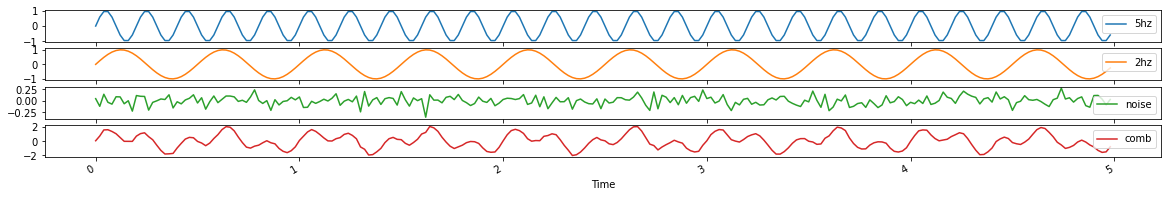

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1234)

time_step = 0.02

time_vec = np.arange(0, 5, time_step)
sine_wave = np.sin(2 * np.pi * 5 * time_vec)
sine_wave2 = np.sin(2 * np.pi * 2 * time_vec)
random_noise =  0.1 * np.random.randn(time_vec.size)
sig = sine_wave + sine_wave2 + random_noise
fig = (
    pd.DataFrame({'5hz': sine_wave, '2hz': sine_wave2, 'noise': random_noise, 'comb': sig}, index=time_vec)
      .plot(figsize=(20,3), 
            subplots=True,
            xlabel='Time')
)
plt.savefig('plots/sine_plots.png', dpi=300)

In [14]:
from scipy import fftpack

sig_fft = fftpack.fft(sig)

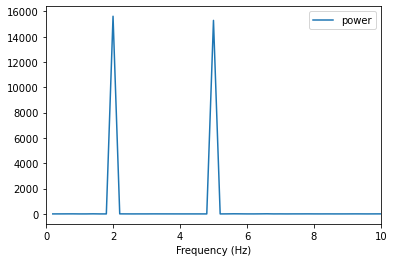

In [15]:
power = np.abs(sig_fft)**2
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
plt_data = pd.DataFrame({"power": power}, index=sample_freq)
(
    plt_data[plt_data.index > 0]
      .plot(xlim=(0,10),
           xlabel='Frequency (Hz)')
)
plt.savefig('plots/sine_power_plot.png', dpi=300)

/home/paul/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


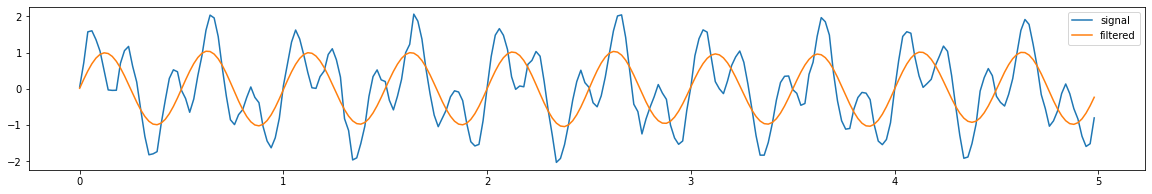

In [17]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > 3] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

pd.DataFrame({'signal': sig, 'filtered': filtered_sig}, index=time_vec).plot(figsize=(20,3))
plt.savefig('plots/sine_freq_cut.png', dpi=300)

/home/paul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until


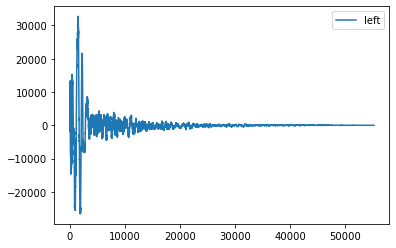

In [18]:
from scipy.io import wavfile

audio_sample_rate, audio_signal = wavfile.read('./sounds/bass1.wav')
left_channel = audio_signal[:, 0]
pd.DataFrame({'left': left_channel}).plot()
plt.savefig('plots/audio_signal.png', dpi=300)

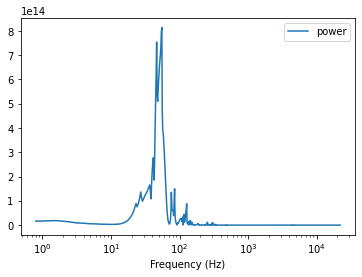

In [19]:
# See the github repository for these functions
from helper_functions import calc_fft, plot_power, filter_freq

audio_fft = calc_fft(left_channel)
plot_power(audio_fft, left_channel, 1/audio_sample_rate)
plt.savefig('plots/audio_power_plot.png', dpi=300)

/home/paul/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


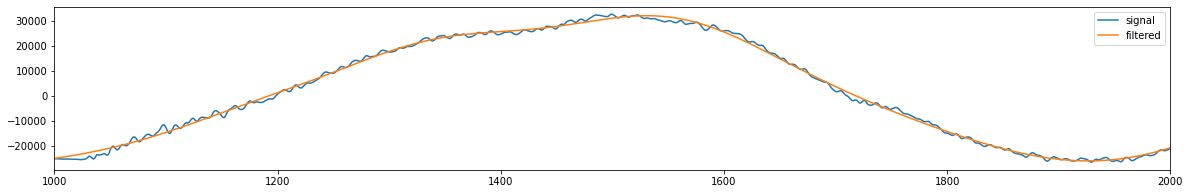

In [20]:
filtered_sig = filter_freq(left_channel, 250, 1/audio_sample_rate)
pd.DataFrame({'signal': left_channel, 'filtered': filtered_sig}).plot(figsize=(20,3), xlim=(1e3, 2e3))
plt.savefig('plots/audio_freq_cut.png', dpi=300)